# Data Visualization in Python 
DA Probability & Statistics Learning Series • Python Lesson 2

<img src="https://pyxis.nymag.com/v1/imgs/0c1/267/38d1f78b4d3b94bd1b630ed7f810f3504b-07-softbank-group-05.2x.rhorizontal.w700.jpg" align="center" height="400" width="600"/>

There's always something to learn from our fellow Vision Fund portfolio companies...

*See **#da_prob_stat** for discussion during and after this tutorial.*


## Goals

- Understand the basic tools available to visualize data in Python
- Create wrapper functions around existing visualization functions to make it easier to use them
- Revisit linear regression and the intuition behind it
- Learn to visualize regressions in Python
- Give Shreyas a shot at being the TA he never was

Let's get started by bringing in the stuff we're going to need for this lesson.

In [1]:
# Import dependencies
from db_utils import get_connection, get_data
import pandas as pd
import datetime

# Data viz
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

_Note that we are importing a new function called `get_data()` from `db_utils`. This is a wrapper around the the `pd.read_sql()` function you've seen before. Type `get_data()` and hit `Shift+Tab` to see how it works._

### Throwback ⏪

In the homework from the previous Python lesson, we calculated the OTP of Air shipments in March 2020

In [6]:
# Get the database connection and cursor objects
conn, cur = get_connection()

# Get data from the otp.sql file
hw_df = get_data('otp.sql', 'file', conn)

# Rename column headers
hw_df.columns = [
    'shipment_id', 
    'completion_date', 
    'mode_blended', 
    'transit_on_time', 
    'all_transit_milestones_completed'
]

In [7]:
# Create an int version of transit_on_time and convert completion date from string to date
hw_df['transit_on_time'] = hw_df['transit_on_time'].apply(lambda x: x == 'True')
hw_df['transit_on_time_int'] = hw_df['transit_on_time'].apply(lambda x: int(x))

hw_df['completion_dt'] = [datetime.datetime.strptime(i, '%Y-%m-%d') for i in hw_df['completion_date']]
hw_df['completion_month'] = hw_df['completion_dt'].dt.month
hw_df['completion_year'] = hw_df['completion_dt'].dt.year

In [13]:
air_march_otp = \
hw_df[
    (hw_df['all_transit_milestones_completed'] == 'Yes') &
    (hw_df['completion_month'] == 3) &
    (hw_df['completion_year'] == 2020) &
    (hw_df['mode_blended'] == 'Air')
].\
groupby(by=['mode_blended', 'completion_month', 'completion_year']).\
agg({'transit_on_time_int' : 'mean'}).\
reset_index()

air_march_otp.columns = ['mode', 'month', 'year', 'otp_percent']

print(f'Air Shipments OTP - March 2020: {air_march_otp.loc[0,"otp_percent"]*100}%')

Air Shipments OTP - March 2020: 36.0%


## Motivating Question 🤔

> What has OTP looked like for Air shipments over the course of 2020? Have things gotten better since Nate joined the team?

In [14]:
air_otp = \
hw_df[
    (hw_df['all_transit_milestones_completed'] == 'Yes') &
    (hw_df['mode_blended'] == 'Air')
].\
groupby(by=['mode_blended', 'completion_month', 'completion_year']).\
agg({'transit_on_time_int' : 'mean'}).\
reset_index()

air_otp.columns = ['mode', 'month', 'year', 'otp_percent']

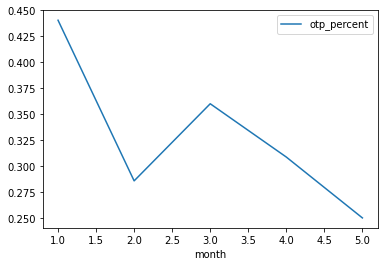

In [15]:
air_otp.plot('month', 'otp_percent')